In [2]:
# Import relevant Libraries
# used for data visualization which provides a convenient interface for creating plots and charts.
import matplotlib.pyplot as plt
# used for scientific computing and numerical analysis. It provides a powerful N-dimensional array object, useful for working with large multi-dimensional arrays and matrices.
import numpy as np
# used for scientific computing and technical computing. It contains modules for optimization, integration, interpolation, signal and image processing, linear algebra, and more.
# linalg module within scipy provides tools for linear algebra computations, such as matrix decompositions, solving linear systems, and computing determinants and inverses of matrices.
from scipy import linalg
# # provides support for type hints, which allows  to annotate the expected types of function arguments and return values
# from typing import Tuple

In [3]:
# this function helps to plot the matrix in a grid 
def matrix_visualization(Matrix, cmap=plt.cm.Blues):
    figure, axis = plt.subplots()
    axis.matshow(Matrix, cmap=cmap)
    # traverse through rows in the grid
    for row in range(Matrix.shape[0]):
      # traverse through columns in the grid
        for column in range(Matrix.shape[1]):
            cell = Matrix[column, row]
            axis.text(row, column, "%.2f" % cell, va="center", ha="center")

In [4]:
# the assignment mentioned that to consider 5*5 grid for the game
grid_size = 5
# as per the question if the agent end up with bad states the game over
bad_states = [ (1, 1), (4, 4)]
# as per the question there were 2 cells mentioned as winning cells with corresponding reward
good_states = [(0, 1), (0, 3)]
# in assingnment there were 2 cells with the arrow towards to it
to_states = [(4, 2), (2, 3)]
# in assignment there were 2 rewards given for the good cells mentioned above
good_rewards = [10, 5]
# decide the next state and rewards acording to current state and chosen action
def step( state, action):
        # extract the column and row details from the current state
        row, column = state
        # extract information such as good state,reward,to state for each combination of all three
        for good_state, reward, to_state in zip(good_states, good_rewards, to_states):
          # the current state is a good state it will automatically navigate to to states with the relevant rewards
            if (row, column) == good_state:
                return (to_state, reward)
        reward = 0
        # if the current state is inside the list of bad states, the reward could be -1 which is a penalty
        if state in bad_states:
            reward = -1
          # if the action is left the agent suppose to move by one cell left which become new state and by default the reward could be -1 for all cells
        if action == "left":
            column_next = max(column - 1, 0)
            row_next = row
            if column - 1 < 0:
                reward = -1
          # if the action is right the agent suppose to move by one cell right which become new state and by default the reward could be -1 for all cells
        elif action == "right":
            column_next = min(column + 1, grid_size - 1)
            row_next = row
            if column + 1 > grid_size - 1:
                reward = -1
                # if the action is left the agent suppose to move by one cell up which become new state and by default the reward could be -1 for all cells
        elif action == "up":
            column_next = column
            row_next = max(row - 1, 0)
            if row - 1 < 0:
                reward = -1
                # if the action is left the agent suppose to move by one cell down which become new state and by default the reward could be -1 for all cells
        elif action == "down":
            column_next = column
            row_next = min(row + 1,grid_size - 1)
            if row + 1 > grid_size - 1:
                reward = -1
        else:
          # if there is any issue with action , such as new action than the pool this section will trow an error
            raise ValueError("Invalid action")
        return ((row_next, column_next), reward)



In [5]:

# setting up  probability matrix metrix with 2 dimention array of 2D array
#[1,  2,  3,  4,  5]
#[6,  7,  8,  9,  10]
#[11, 12, 13, 14, 15]
#[16, 17, 18, 19, 20]
#[21, 22, 23, 24, 25] 
#each and every row shows the probability for the corresponding state transition from each cell to every cell
Probability = np.zeros((grid_size * grid_size, grid_size * grid_size))
#similar to the probability the same theory applies to reward  as well.
Reward = np.zeros_like(Probability)
# for each cell the possible action is given as left,right,up,or down
all_possible_actions=["left","right","up","down"]
# Traverse through row
for row in range(grid_size):
    # Traverse through column
    for column in range(grid_size):
        # in a 2d plane we need 2 coodinates to locate a position, which is called state in reinforcement learning
        # so the current state is located by column id and row id
        state = (row, column)
        # For each and every state there could be 4 possible actions "left","right","up","down"
        for action in all_possible_actions:
          # For each and every action chosen at the state which is currently located could end up with a new state and there could be a reward.
            next_state, reward = step(state, action)
            (row_next, column_next) = next_state
            # probability for all possible action from current state is equal and it could be 0.25
            Probability[row * grid_size + column, row_next * grid_size + column_next] += 0.25
            # initial state and the ending states are the only deciding factor in reward calculation
            Reward[row * grid_size + column, row_next * grid_size + column_next] = reward

In [6]:
# since traverse out from the grid is restricted the corner cells receive probability of self transition could be 0.5 because there will be 2 chances for traverse out from the grid.
# for inner cells the probability could be shown as 0.25 because they could have possibility to take action of right left up and down.
# since this could be model based approach. the termination states are given. At the termination states there will not be any actions towards out side. so the probability of termination states are 1 as self transition.
print(Probability)


[[0.5  0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.25 0.25 0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.   0.   0.   0.   0.25 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.25 0.25 0.   0.   0.   0.25 0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.25 0.   0.25 0.   0.   0.   0.25 0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.25 0.   0.25 0.   0.   0.   0.25 0.
  0.   0.   0.   0.   0.   0.   0.

In [7]:
# reward to the corner cell and bad cells are updated as -1 and rewad to good cells updated accordingly.for the other cells there are no possibility to go from current state so it is zero.
print(Reward)

[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  

In [8]:
# the row in the given metrix suppose to have the total 1. Because each and every row means that from a cell has how much probability to go out towards other cells. So it should be one
assert((np.sum(Probability, axis=1) == 1).all())

In [9]:
# The expecteds could be calculated as matrix multiplication of Probability and Reward. Later sumation of every row. Because that's what means for each state
ExpectedReward = np.sum(Probability * Reward, axis=1, keepdims=True)

In [10]:
# Since there are 25 states there are 25 data in the output of expected reward
ExpectedReward

array([[-0.5 ],
       [10.  ],
       [-0.25],
       [ 5.  ],
       [-0.5 ],
       [-0.25],
       [-1.  ],
       [ 0.  ],
       [ 0.  ],
       [-0.25],
       [-0.25],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [-0.25],
       [-0.25],
       [ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [-0.25],
       [-0.5 ],
       [-0.25],
       [-0.25],
       [-0.25],
       [-1.  ]])

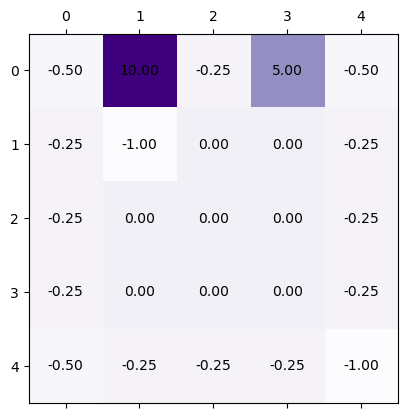

In [11]:
# Inorder to show it in a grid it could be reshaped as 5*5 metrix so that it could clearly visualize the outcome of expected reward
Reward_square = ExpectedReward.reshape((grid_size,grid_size))
# Visualize the expected rewards for corresponding states
matrix_visualization(Reward_square, cmap=plt.cm.Purples)

In [12]:
#difining the discount factor to difine the balance between immediate reward and future reward.
gamma = 0.9

In [13]:
# Applying the findings to belman equation to generate value function
BelmanOutcome = np.eye(grid_size*grid_size) - gamma * Probability
Value = linalg.solve(BelmanOutcome, ExpectedReward)
Value

array([[ 2.93516553],
       [ 8.54677726],
       [ 4.09005132],
       [ 4.98850055],
       [ 1.23710684],
       [ 0.85029404],
       [ 1.51655083],
       [ 1.66378783],
       [ 1.55188616],
       [ 0.25776062],
       [-0.41181467],
       [ 0.12381123],
       [ 0.23612428],
       [-0.01277716],
       [-0.79003975],
       [-1.28146693],
       [-0.79058828],
       [-0.72538066],
       [-1.05475809],
       [-1.85512039],
       [-2.10042757],
       [-1.63068936],
       [-1.61469193],
       [-2.09453553],
       [-3.43395015]])

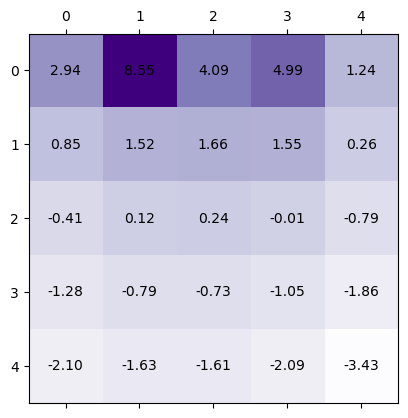

In [14]:
# In order to show the values of each states in a grid the out come of the value function got reshaped
ReshapedValue = Value.reshape((grid_size,grid_size))
# visualizing the results in a grid for better look and feel
matrix_visualization(ReshapedValue, cmap=plt.cm.Purples)